In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* Feature Engineering
* Missing Value
* One Hot Encoding

In [5]:
# Combine the data
combined=pd.concat([train,test],ignore_index=True)

In [6]:
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# EDA

In [7]:
# Check the missing values
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [8]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
cabins=[ 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [10]:
train.shape,test.shape,combined.shape

((891, 12), (418, 11), (1309, 12))

In [11]:
def cabin_labels(x):
    if x in cabins:
        return ('Cabin_Avbl')
    else:
        return ('Missing')

In [12]:
# lets apply this on cabin columns
combined['Cabin_Cat']=combined['Cabin'].apply(cabin_labels)

<Axes: xlabel='Survived'>

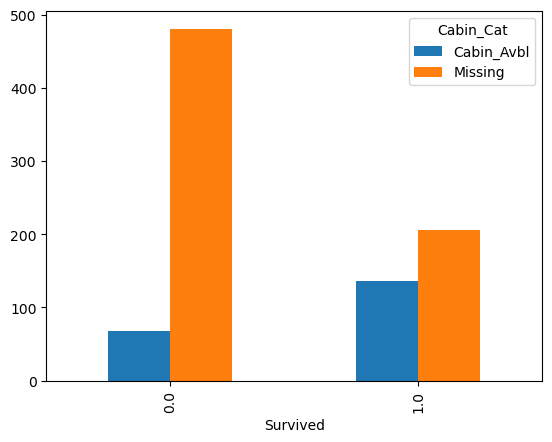

In [13]:
pd.crosstab(combined.Survived,combined.Cabin_Cat).plot(kind='bar')

### Name

In [14]:
combined.Name[0].split(', ')[1].split('. ')[0] # for 1 name

'Mr'

In [15]:
titles=[]  # for all the names
for i in combined.Name:
    titles.append(i.split(', ')[1].split('. ')[0])

In [16]:
combined['Titles']=pd.Series(titles)

In [17]:
combined.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [18]:
titles_ignore=[ 'Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

def notitle(x):
    if x in titles_ignore:
        return('Others')
    else:
        return(x)

In [19]:
combined['Titles']=combined.Titles.apply(notitle)

In [20]:
combined.Titles.apply(notitle).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms'], dtype=object)

In [21]:
combined.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [22]:
combined.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Cat,Titles
0,0.0,3,male,22.0,1,0,7.2500,S,Missing,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Cabin_Avbl,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Missing,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Cabin_Avbl,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Missing,Mr


### Family

In [23]:
combined['Family']=combined.SibSp+combined.Parch+1

In [24]:
combined.Family.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [25]:
combined.Family.describe()

count    1309.000000
mean        1.883881
std         1.583639
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: Family, dtype: float64

In [26]:
def parivar(x):
    if x==1:
        return('Solo')
    elif x==2:
        return('Duo')
    elif x<=4:
        return('Small')
    else:
        return('Large')

In [27]:
combined['Family'].apply(parivar).unique()

array(['Duo', 'Solo', 'Large', 'Small'], dtype=object)

In [28]:
combined['Family_Cat']=combined['Family'].apply(parivar)

<Axes: xlabel='Survived'>

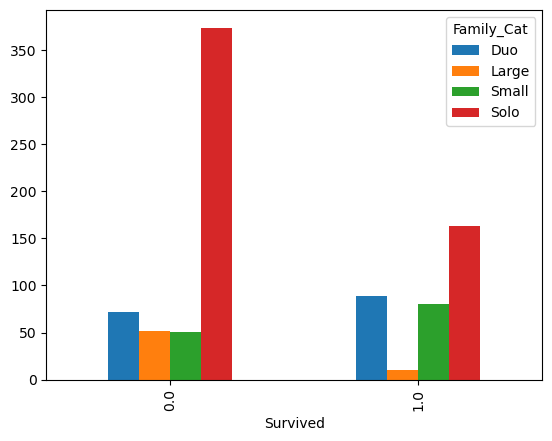

In [29]:
pd.crosstab(combined.Survived,combined.Family_Cat).plot(kind='bar')

### Missing Values

In [30]:
combined.groupby('Titles')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
Others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [31]:
combined.loc[combined.Age.isnull(),'Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms'], dtype=object)

In [32]:
missing_titles=combined.loc[combined.Age.isnull(),'Titles'].unique()

In [33]:
for i in missing_titles:
    combined.loc[combined.Age.isnull(),'Age']=combined.loc[combined.Titles==i,'Age'].median()

In [34]:
combined.Embarked.mode()[0]

'S'

In [35]:
combined.loc[combined.Embarked.isnull(),'Embarked']=combined.Embarked.mode()[0]

In [36]:
combined.loc[combined.Fare.isnull(),'Fare']=combined.Fare.median()

In [37]:
combined.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Cat,Titles,Family,Family_Cat
0,0.0,3,male,22.0,1,0,7.2500,S,Missing,Mr,2,Duo
1,1.0,1,female,38.0,1,0,71.2833,C,Cabin_Avbl,Mrs,2,Duo
2,1.0,3,female,26.0,0,0,7.9250,S,Missing,Miss,1,Solo
3,1.0,1,female,35.0,1,0,53.1000,S,Cabin_Avbl,Mrs,2,Duo
4,0.0,3,male,35.0,0,0,8.0500,S,Missing,Mr,1,Solo


In [38]:
# Split the data back in train and test

newtrain=combined.loc[0:train.shape[0]-1,]
newtest=combined.loc[train.shape[0]:,]
newtrain.shape,newtest.shape

((891, 12), (418, 12))

In [39]:
X=newtrain.drop(['Survived'],axis=1)
y=newtrain.Survived.astype(int)

newtest.drop(['Survived'],axis=1,inplace=True)

### Model Building

* Base Model - the first model in classification which is also known as Base model should be a prediction of 0


In [40]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':0})

submission.to_csv('basemodel.csv',index=False)

In [41]:
cd

/Users/krishansmacbook


In [42]:
## dummyfy the data
newX=pd.get_dummies(X,drop_first=True)
newtest=pd.get_dummies(newtest,drop_first=True)

In [43]:
from sklearn.linear_model import LogisticRegression



In [45]:
lg=LogisticRegression()
pred=lg.fit(newX,y).predict(newtest)

In [46]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':pred})

submission.to_csv('logistic_model.csv',index=False) #76.315

In [47]:
cd

/root


In [48]:
import statsmodels.api as sma

model = sma.Logit(y,newX).fit()

         Current function value: 0.397365
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      873
Method:                           MLE   Df Model:                           17
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.4033
Time:                        06:55:39   Log-Likelihood:                -354.05
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.198e-91
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass               -0.8026      0.187     -4.292      0.000      -1.169      -0.436
Age                  -0.0234      0.009     -2.505      0.012      -0.042      -0.005
SibSp               -31.3068   2.14e+05     -0.000      1.000   -4.19e+05    4.19e+05
Parch               -31.1991   2.14e+05     -0.000      1.000   -4.19e+05    4.19e+05
Fare                  0.0034      0.003      1.314      0.189      -0.002       0.009
Family               31.2270   2.14e+05      0.000      1.000   -4.19e+05    4.19e+05
Sex_male            -26.4820   2.14e+05     -0.000      1.000   -4.19e+05    4.19e+05
Embarked_Q            0.0330      0.401      0.082      0.935      -0.754       0.819
Embarked_S           -0.3189      0.254     -1.256      0.209      -0.816       0.179
Cabin_Cat_Missing    -0.6404      0.322     -1.991      0.047      -1.271      -0.010
Titles_Miss         -27.1476   2.14e+05     -0.000      1.000   -4.19e+05    4.19e+05
Titles_Mr            -3.5874      0.598     -6.003      0.000      -4.759      -2.416
Titles_Mrs          -26.4678   2.14e+05     -0.000      1.000   -4.19e+05    4.19e+05
Titles_Ms            -4.1434   2.85e+05  -1.45e-05      1.000   -5.58e+05    5.58e+05
Titles_Others        -3.5582      0.824     -4.316      0.000      -5.174      -1.942
Family_Cat_Large     -2.5015      1.291     -1.937      0.053      -5.032       0.029
Family_Cat_Small      0.1452      0.500      0.291      0.771      -0.834       1.125
Family_Cat_Solo       0.3804      0.391      0.972      0.331      -0.387       1.148
=====================================================================================
"""

### Basic Infrance on the Output

* There are lot of features which have a very high PValue which indicates that the features are statistically insignificant.

* This also indicates that there is lot of multicollinearity between the categorical predictors
    
* Warning also suggests that the model is not a good model because mle could not help coverge the sigmod curve

In [50]:
# Vif for multicolinearty check....
from statsmodels.stats.outliers_influence import \
variance_inflation_factor

vif = []
for i in range(newX.shape[1]):
    vif.append(variance_inflation_factor(newX.values,i))


In [51]:
pd.DataFrame(vif,columns=["Value"],index=newX.columns).sort_values(ascending=False,by='Value')

,Value
Family,1541.844876
SibSp,386.127423
Parch,208.163779
Sex_male,45.570269
Titles_Miss,38.104557
Titles_Mrs,29.624656
Titles_Mr,8.477798
Family_Cat_Large,8.368818
Family_Cat_Solo,3.209859
Family_Cat_Small,2.982278


In [52]:
# SIPSB,PARCH Title_MR

subset = newX.drop(["SibSp","Parch","Sex_male"],axis=1)

In [53]:
# Lets Rebuild the model
model = sma.Logit(y,subset).fit()
model.summary()

         Current function value: 0.421190
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                           14
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3675
Time:                        06:55:40   Log-Likelihood:                -375.28
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.084e-84
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass               -0.2969      0.168     -1.773      0.076      -0.625       0.031
Age                  -0.0131      0.009     -1.504      0.133      -0.030       0.004
Fare                  0.0097      0.003      3.240      0.001       0.004       0.016
Family                0.5728      0.170      3.372      0.001       0.240       0.906
Embarked_Q            0.1156      0.394      0.293      0.769      -0.657       0.888
Embarked_S           -0.0706      0.241     -0.293      0.769      -0.542       0.401
Cabin_Cat_Missing    -0.7748      0.314     -2.468      0.014      -1.390      -0.159
Titles_Miss           0.8299      0.449      1.847      0.065      -0.051       1.711
Titles_Mr            -1.9628      0.468     -4.195      0.000      -2.880      -1.046
Titles_Mrs            1.5941      0.507      3.145      0.002       0.601       2.587
Titles_Ms            21.3221   4.64e+04      0.000      1.000   -9.09e+04    9.09e+04
Titles_Others        -1.0974      0.632     -1.736      0.082      -2.336       0.141
Family_Cat_Large     -5.0538      1.047     -4.825      0.000      -7.107      -3.001
Family_Cat_Small     -0.0480      0.396     -0.121      0.903      -0.823       0.727
Family_Cat_Solo       1.2741      0.321      3.971      0.000       0.645       1.903
=====================================================================================
"""

### Lets Remove the High Pvalue

In [54]:
localdf = pd.DataFrame(model.pvalues,columns=['Pvalue']).reset_index()
localdf

,index,Pvalue
0,Pclass,0.076269
1,Age,0.132539
2,Fare,0.001194
3,Family,0.000745
4,Embarked_Q,0.769247
5,Embarked_S,0.769418
6,Cabin_Cat_Missing,0.013606
7,Titles_Miss,0.064786
8,Titles_Mr,0.000027
9,Titles_Mrs,0.001659


In [55]:
feats = list(localdf.loc[localdf['Pvalue']<0.05, "index"])

In [56]:
feats

['Fare',
 'Family',
 'Cabin_Cat_Missing',
 'Titles_Mr',
 'Titles_Mrs',
 'Family_Cat_Large',
 'Family_Cat_Solo']

In [57]:
# Model of important features
newfits = subset.loc[:,feats]
model = sma.Logit(y,newfits).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.434542
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3474
Time:                        06:55:40   Log-Likelihood:                -387.18
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.329e-86
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fare                  0.0109      0.003      4.200      0.000       0.006       0.016
Family                0.4258      0.098      4.363      0.000       0.235       0.617
Cabin_Cat_Missing    -0.9245      0.232     -3.977      0.000      -1.380      -0.469
Titles_Mr            -2.5722      0.203    -12.698      0.000      -2.969      -2.175
Titles_Mrs            0.8667      0.293      2.958      0.003       0.292       1.441
Family_Cat_Large     -4.4873      0.639     -7.018      0.000      -5.740      -3.234
Family_Cat_Solo       0.9603      0.219      4.387      0.000       0.531       1.389
=====================================================================================
"""

In [ ]:
# Predict the Output using Sigmoid

In [63]:
model.params[0]

0.010875111611108868

In [60]:
newtest.loc[:,feats].head(1)

,Fare,Family,Cabin_Cat_Missing,Titles_Mr,Titles_Mrs,Family_Cat_Large,Family_Cat_Solo
891,7.8292,1,1,1,0,0,1


In [62]:
## Equation for prediction
# log(odds)=beta1 * fare + beta2* family + beta3* cabin_cat_missing+.....

In [67]:
logit=model.params[0]*newtest['Fare']+model.params[1]*newtest['Family']+model.params[2]*newtest['Cabin_Cat_Missing']+\
+model.params[3]*newtest['Titles_Mr']+model.params[4]*newtest['Titles_Mrs']+model.params[5]*newtest['Family_Cat_Large']+model.params[6]*newtest['Family_Cat_Solo']

In [74]:
# Prob using sigmoid
prob=1/(1+np.exp(-logit))
print('Prob using Sigmoid',pd.DataFrame(prob).head(1))
direct=model.predict(newtest.loc[:,feats].head(1))
print('Direct Function',direct)

Prob using Sigmoid             0
891  0.116557
Direct Function 891    0.116557
dtype: float64


In [75]:
# Interpretation of coefficients

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3474
Time:                        07:28:54   Log-Likelihood:                -387.18
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.329e-86
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fare                  0.0109      0.003      4.200      0.000       0.006       0.016
Family                0.4258      0.098      4.363      0.000       0.235       0.617
Cabin_Cat_Missing    -0.9245      0.232     -3.977      0.000      -1.380      -0.469
Titles_Mr            -2.5722      0.203    -12.698      0.000      -2.969      -2.175
Titles_Mrs            0.8667      0.293      2.958      0.003       0.292       1.441
Family_Cat_Large     -4.4873      0.639     -7.018      0.000      -5.740      -3.234
Family_Cat_Solo       0.9603      0.219      4.387      0.000       0.531       1.389
=====================================================================================
"""

In [80]:
np.exp(0.0109) # Increase of odds

# By an increase of fare by 1 $, odds of surviving increase by 100x

1.0109596214276102

In [81]:
np.exp(-4.4873	) # decrease of odds

# By an increase of one family member, odds of surviving decrease by 1.1%
# This mean thaty the increase of family meember is negatively correalted with survival of passengers...

0.011250980483955841

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()

gbm.fit(newX,y)

GradientBoostingClassifier()

In [ ]:
pd.DataFrame(gbm.feature_importances_,columns=['FE'],)

In [93]:
# McFadden
mcfadden=1-(model.llf/model.llnull)

print('McFadden R2:',mcfadden)

McFadden R2: 0.3474488787775447


In [95]:
# Cox and snell

L0 = np.exp(model.llnull)
L1 = np.exp(model.llf)
cox_snell=1-(L0/L1)**(2/newX.shape[0])

In [98]:
# Nagelkerke

nagelkerke=cox_snell/(1-L0**(2/newX.shape[0]))

print('McFadden:',mcfadden)
print('Cox and snell:',cox_snell)
print('Nagelkerke:',nagelkerke)

McFadden: 0.3474488787775447
Cox and snell: 0.37044416823032167
Nagelkerke: 0.5033176723723485


In [99]:
# which one to go with ?

# McFadden is generally a conservative model

# Cox and snell is used to commpare thenested models and thus it carries lot of refernce there.Because the value of R2 is adjusted on the basis of n.

# Nagelkerke is based on cox and snell but it is more better estinmate because it can easily achieve valyes closer to 1 (not really )
# but it is the highest R2 amongst all.

# Therfore, Nagelkerke is the goto R2 value for the model

In [100]:
# AIC :- Akaike information criterion

In [ ]:
# Aic measures the good fit of the model by comparing multiple competing model
# Lower Value is prefer because it penalisis when the model has ore feature thereby reducing the risk of overfiting

# Formula of AIC = 2k- 2 ln(l). where k is feature/predictors and l is log(linklihood of full model)

In [105]:
model.aic     # Lower the AIC better the model

788.3531401238849

In [107]:
# Wald test
# Model.bse represent standard error
teststats=model.params[0]/model.bse[0]
teststats

4.199591904359971

In [108]:
# value# Since the logReg Model follows Chi Square Distt....

import scipy.stats as stats
stats.chi2.sf(teststats,1) # wald test has df of 1

0.040433708686825005